In [1]:
!pip install -U --force-reinstall --no-cache-dir numpy==2.0.2 scipy==1.16.1 scikit-learn==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 230.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 220.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 230.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 202.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found

In [1]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [2]:
import pandas as pd
import io

# ##################################################################################################################
# Passar a variável uploaded para read_csv, que recebe dois parâmetros:                                            #
# (i) io.BytesIO -> Simula o caminho do csv utilizando a variável uploaded, que é o primeiro parâmetro de entrada. #
# (ii) sep -> separador utilizado no txt, nesse caso é a tabulação, é o segundo parâmetro de entrada.              #
####################################################################################################################


df = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled.txt']), sep = '\t')

In [3]:
# Renomeando as colunas para garantir que fiquem no padrão text / target
df.columns = ['text','target']



In [4]:
# Testando se o dataframe carregou certo
print(df.head())
print(df.groupby('target').count())

                                                text  target
0  So there is no way for me to plug it in here i...       0
1                        Good case, Excellent value.       1
2                             Great for the jawbone.       1
3  Tied to charger for conversations lasting more...       0
4                                  The mic is great.       1
        text
target      
0        500
1        500


In [5]:
##############################################################
# Verificação de percentual de balanceamento                 #
##############################################################

contagem_classes = df.groupby('target')['target'].count()
total = contagem_classes.sum()
porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)

target
0    50.0
1    50.0
Name: target, dtype: float64


In [6]:
##############################################################
# Separação X e y                                            #
##############################################################
X = df['text']
y = df['target']

In [7]:
##############################################################
# Split treino e teste                                       #
##############################################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)

In [8]:
##############################################################
# Vetorização TF-IDF                                         #
##############################################################
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

In [9]:
##############################################################
# Modelo Random Forest                                       #
##############################################################
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [10]:
# Predição
y_pred = model.predict(X_test_tfidf)
y_proba = model.predict_proba(X_test_tfidf)[:,1]

In [11]:
##############################################################
# Métricas                                                   #
##############################################################
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.784
Precision: 0.7563025210084033
Recall: 0.782608695652174


In [12]:
# Área sob a curva ROC
area = metrics.roc_auc_score(y_test, y_proba)
print("AUC:", area)

AUC: 0.8765217391304349


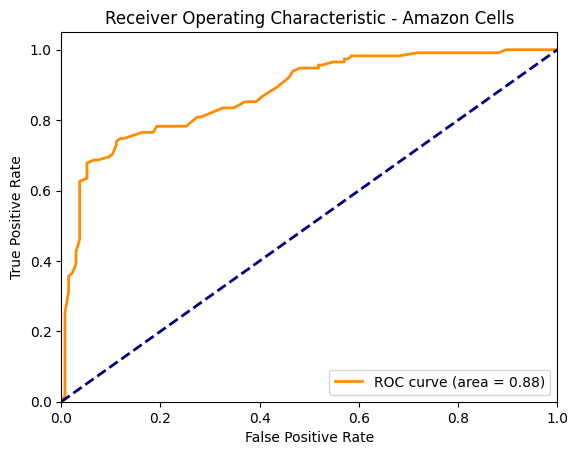

In [13]:
# Curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Amazon Cells')
plt.legend(loc="lower right")
plt.show()